Statistical inference involves taking your data to probabilistic conclusions about what you would expect if you took even more data, and you can make decisions based on these conclusions.

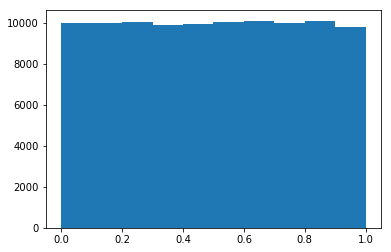

In [2]:
# Seed the random number generator
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
# Initialize random numbers: random_numbers
random_numbers =np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] =np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


The histogram is almost exactly flat across the top, indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram.

# Bernoulli trials

Bernoulli trial can be thought of as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure).

In [3]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success =0


    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number=np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number<p:
            n_success+=1

    return n_success


Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. We would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, we will do a simulation. We will perform 100 Bernoulli trials using the perform_bernoulli_trials() function we wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) We will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, we will plot a histogram describing the probability of the number of defaults.

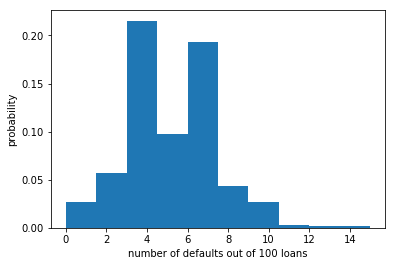

In [4]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults=np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] =perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults,normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()


In [1]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n=len(data)

    # x-data for the ECDF: x
    x=np.sort(data)

    # y-data for the ECDF: y
    y= np.arange(1,n+1) / n

    return x, y


[  6.   5.   7.   8.   5.   5.   3.   2.   7.   6.   7.   3.   8.   3.   8.
   5.   2.   6.   4.   5.   3.   2.   9.   5.   5.   3.   8.   7.   7.   5.
   4.   3.   4.   5.   6.   1.   8.   4.   2.   9.   6.   5.   2.   6.   3.
   6.   2.   6.   4.   4.   6.   4.   5.   4.   3.   4.   6.   3.   4.   8.
   2.   4.   1.   6.   6.   6.   2.   2.   3.   8.   7.   2.   6.   6.   3.
   6.   3.  10.   7.   6.   4.   5.   8.   4.   6.   4.   6.   1.  10.   4.
   4.   4.   5.   4.   5.   2.   8.   7.   3.   7.   9.   6.   8.   2.   5.
   4.   3.   6.   2.   6.   9.   5.   6.   6.   4.   4.   7.   6.   6.   7.
   1.   5.   4.   1.   4.   6.   3.   2.   3.   8.   8.   6.   7.   6.   4.
   4.   7.   2.   4.   7.   5.   4.   6.   6.   8.   4.   2.   5.   6.   3.
   7.   6.   5.  10.   4.   4.   5.   7.   7.   6.   6.   4.   6.   9.   4.
   4.   7.   4.   8.   5.   4.   3.   3.   6.   6.   1.   5.   7.   3.   7.
   3.   4.   4.   3.   2.   2.   0.   7.   3.   7.   7.   3.   8.   6.   4.
   3.   4.  

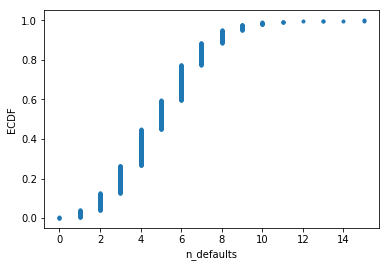

Probability of losing money = 0.022


In [6]:
# Compute ECDF: x, y
print(n_defaults)
x,y=ecdf(n_defaults)

# Plot the ECDF with labeled axes

_=plt.plot(x,y,marker='.',linestyle='none')


plt.xlabel('n_defaults')
plt.ylabel('ECDF')



# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money=np.sum(n_defaults>=10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


As we might expect, we most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

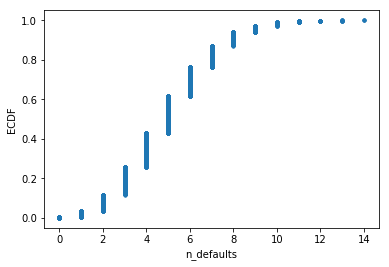

In [7]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults=np.random.binomial(100,0.05,size=10000)
# Compute CDF: x, y
x,y=ecdf(n_defaults)

# Plot the CDF with axis labels
_=plt.plot(x,y,marker='.',linestyle='none')


plt.xlabel('n_defaults')
plt.ylabel('ECDF')



# Show the plot
plt.show()




# Show the plot



Using built-in algorithms to directly sample out of the distribution is much faster.(np.random.binomial(n,p,size))

Plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here.

Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to plt.hist() via the bins keyword argument.

We want the bins centered on the integers. So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5. We can generate an array like this using np.arange() and then subtracting 0.5 from the array.

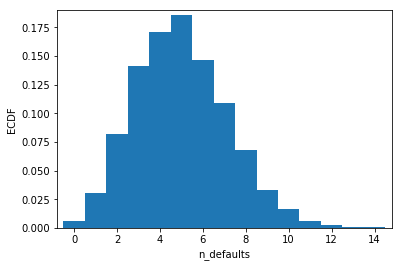

In [8]:
# Compute bin edges: bins
bins = np.arange(0,max(n_defaults) +1.5) - 0.5

# Generate histogram
plt.hist(n_defaults,bins=bins,normed=True)

# Set margins
plt.margins(0.02)

# Label axes

plt.xlabel('n_defaults')
plt.ylabel('ECDF')

# Show the plot
plt.show()


# Poisson

Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes.

The Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

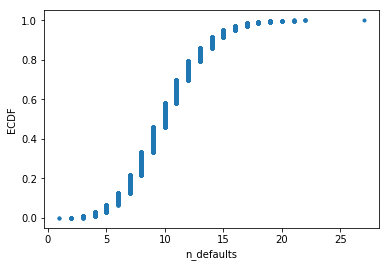

Poisson:      10.0045 3.16330203269
n = 20 Binom: 9.9846 2.23717742703
n = 100 Binom: 9.9512 2.99483197525
n = 1000 Binom: 10.0644 3.1600083291


In [10]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson=np.random.poisson(10,size=10000)
x,y=ecdf(samples_poisson)

# Plot the CDF with axis labels
_=plt.plot(x,y,marker='.',linestyle='none')


plt.xlabel('n_defaults')
plt.ylabel('ECDF')



# Show the plot
plt.show()

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n=[20,100,1000]
p=[0.5,0.1,0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial =np.random.binomial(n[i],p[i],size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.

When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, in our case the mean number of no-hitters per season.

In [11]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters=np.random.poisson(251/115,size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters>=7)

# Compute probability of getting seven or more: p_large
p_large=n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0067


The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.